##  import  data and required package

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor,RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings
warnings.filterwarnings('ignore')


In [4]:
df= pd.read_csv('stud.csv')

In [5]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [8]:
## X and y variable
X= df.drop(['math_score'],axis=1)

In [9]:
y= df['math_score']

In [10]:
X.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75


In [11]:
y.head()

0    72
1    69
2    90
3    47
4    76
Name: math_score, dtype: int64

In [15]:
## create a column transformer with three types of transformer 
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer

numerical_features= X.select_dtypes(exclude='object').columns
categorical_features= X.select_dtypes(include='object').columns

numeric_transformer= StandardScaler()
oh_transformer=OneHotEncoder()
preprocessor=ColumnTransformer([
    ('OneHotEncoder',oh_transformer,categorical_features),
    ('Numerical_features',numeric_transformer,numerical_features)
]
)



In [17]:
X= preprocessor.fit_transform(X)

In [18]:
X.shape

(1000, 19)

In [19]:
## Split the traning and testing dataset
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.3,random_state=42)

#### Create an Evaluate Function to give all metrics after model Training

In [25]:
def evaluate_model(true,predicted):
    mae= mean_absolute_error(true,predicted)
    r2score= r2_score(true,predicted)
    mse= mean_squared_error(true,predicted)
    rmse=np.sqrt(mean_squared_error(true,predicted))
    return mae,mse,r2score,rmse

In [28]:
models={
    "LinearRegression": LinearRegression(),
    "Ridge":Ridge(),
    "Lasso":Lasso(),
    "DecisionTreeRegressor":DecisionTreeRegressor(),
    "AdaBoostRegressor":AdaBoostRegressor(),
    "RandomForestRegressor":RandomForestRegressor(),
    "DecisionTreeRegressor":DecisionTreeRegressor(),
    "KNeighborsRegressor": KNeighborsRegressor(),
    "CatBoostRegressor":CatBoostRegressor(verbose=False),
    "Support Vector Regressor":SVR(),
    "XGBoost Regressor":XGBRegressor()
    
}


model_list=[]
r2_list=[]

for i in range(len(list(models))):
    model= list(models.values())[i]
    model.fit(X_train,y_train)
    

				## make prediction 
    y_train_pred= model.predict(X_train)
    y_test_pred= model.predict(X_test)
    

				## Evaluate the model
    model_train_mae,model_train_mse,model_train_r2_score,model_train_rmse= evaluate_model(y_train,y_train_pred)
    model_test_mae,model_test_mse,model_test_r2_score,model_test_rmse= evaluate_model(y_test,y_test_pred)
    

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print("Model perfromance for training set")
    print("Mean absolute error:{:.4f}".format(model_train_mae))
    print("Mean squared error:{:.4f}".format(model_train_mse))
    print(" Root Mean squared error:{:.4f}".format(model_train_rmse))
    print(" R2 score :{:.4f}".format(model_train_r2_score))
	
    print("---------------------------------------------------------")
	
    print("Model perfromance for test set")
    print("Mean absolute error:{:.4f}".format(model_test_mae))
    print("Mean squared error:{:.4f}".format(model_test_mse))
    print(" Root Mean squared error:{:.4f}".format(model_test_rmse))
    print(" R2 score :{:.4f}".format(model_test_r2_score))
    r2_list.append(model_test_r2_score)
	
    print("="*35)
    print("\n")
	
				


LinearRegression
Model perfromance for training set
Mean absolute error:4.2082
Mean squared error:27.7484
 Root Mean squared error:5.2677
 R2 score :0.8742
---------------------------------------------------------
Model perfromance for test set
Mean absolute error:4.4779
Mean squared error:31.7310
 Root Mean squared error:5.6330
 R2 score :0.8725


Ridge
Model perfromance for training set
Mean absolute error:4.1977
Mean squared error:27.5484
 Root Mean squared error:5.2487
 R2 score :0.8751
---------------------------------------------------------
Model perfromance for test set
Mean absolute error:4.4155
Mean squared error:30.8757
 Root Mean squared error:5.5566
 R2 score :0.8759


Lasso
Model perfromance for training set
Mean absolute error:5.1582
Mean squared error:42.3875
 Root Mean squared error:6.5106
 R2 score :0.8078
---------------------------------------------------------
Model perfromance for test set
Mean absolute error:5.3929
Mean squared error:47.2041
 Root Mean squared er

In [29]:
pd.DataFrame(list(zip(model_list,r2_list)),columns=["Model_name","R2_score"]).sort_values(by=["R2_score"],ascending=False)

,Model_name,R2_score
1,Ridge,0.875907
0,LinearRegression,0.872469
7,CatBoostRegressor,0.852108
5,RandomForestRegressor,0.847917
4,AdaBoostRegressor,0.842406
9,XGBoost Regressor,0.811816
2,Lasso,0.810281
6,KNeighborsRegressor,0.772328
3,DecisionTreeRegressor,0.734363
8,Support Vector Regressor,0.726848


In [30]:
## Linear Regression
lin_model= LinearRegression(fit_intercept=True)
lin_model= lin_model.fit(X_train,y_train)
y_pred= lin_model.predict(X_test)
r2score= r2_score(y_test,y_pred)*100
print("the accuracy of the model is {:.4f}".format(r2score))

the accuracy of the model is 87.2469


Text(0, 0.5, 'predicted')

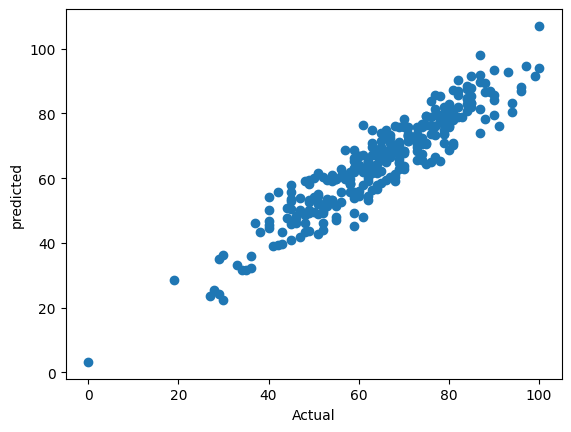

In [31]:
plt.scatter(y_test,y_pred)
plt.xlabel("Actual")
plt.ylabel("predicted")

<Axes: xlabel='math_score'>

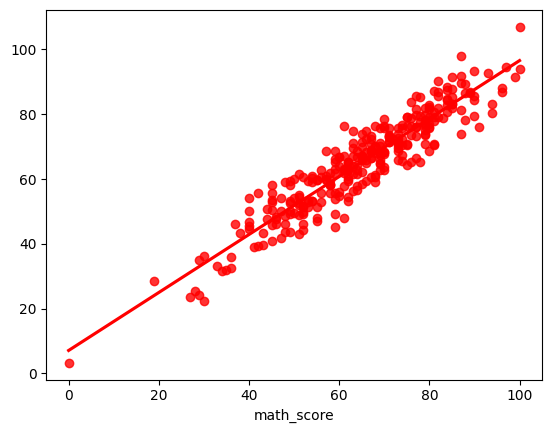

In [33]:
sns.regplot(x=y_test,y=y_pred,ci=None,color="red")

In [34]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
521,91,76.125,14.875
737,53,59.500,-6.500
740,80,77.125,2.875
660,74,76.750,-2.750
411,84,88.500,-4.500
...,...,...,...
468,77,73.250,3.750
935,70,62.750,7.250
428,65,58.375,6.625
7,40,44.500,-4.500
